In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
  def __init__(self, d_model, dropout = 0.0, max_length = 5000):
    """
    Args:
      d_model:      dimension of embeddings
      dropout:      randomly zeroes-out some of the input
      max_length:   max sequence length
    """
    # inherit from Module
    super().__init__()     

    # initialize dropout                  
    self.dropout = nn.Dropout(p=dropout)      

    # create tensor of 0s
    pe = torch.zeros(max_length, d_model)    

    # create position column   
    k = torch.arange(0, max_length).unsqueeze(1)  

    # calc divisor for positional encoding 
    div_term = torch.exp(                                 
            torch.arange(0, d_model, 2) * -(math.log(10000000.0) / d_model)
    )

    # calc sine on even indices
    pe[:, 0::2] = torch.sin(k * div_term)    

    # calc cosine on odd indices   
    pe[:, 1::2] = torch.cos(k * div_term)  

    # add dimension     
    pe = pe.unsqueeze(0)          

    # buffers are saved in state_dict but not trained by the optimizer                        
    self.register_buffer("pe", pe)                        

  def forward(self, x):
    """
    Args:
      x:        embeddings (batch_size, seq_length, d_model)
    
    Returns:
                embeddings + positional encodings (batch_size, seq_length, d_model)
    """
    # add positional encoding to the embeddings
    x = x + self.pe[:, : x.size(1)].requires_grad_(False) 

    # perform dropout
    #x = self.dropout(x)
    return  x

In [2]:
L = 1005
d_model = 64

Text(0.5, 3.722222222222216, 'Dim')

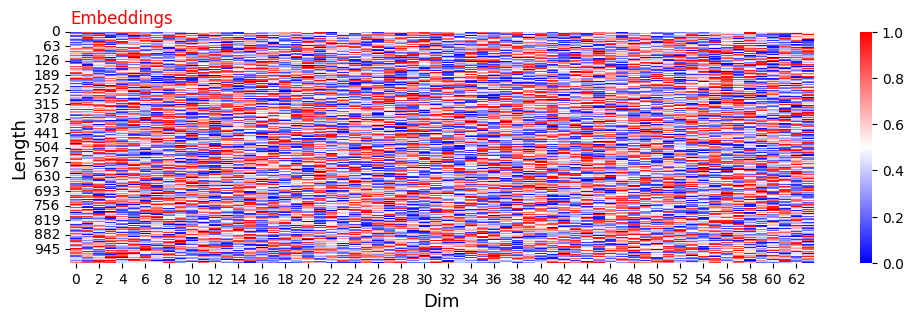

In [3]:
x = torch.rand((L,d_model))
fig,ax = plt.subplots(figsize=(12,3))
sns.heatmap(pd.DataFrame(x.numpy()), cmap='bwr', ax = ax, vmin=0, vmax=1)
ax.set_title('Embeddings', c='r', loc ='left')
ax.set_ylabel('Length', fontsize=13)
ax.set_xlabel('Dim', fontsize=13)

In [4]:
self = PositionalEncoding(d_model=d_model, dropout=0.0, max_length=L)

In [5]:
self.pe.shape

torch.Size([1, 1005, 64])

In [6]:
self.pe[:, : x.size(1)].requires_grad_(False) 

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  5.6818e-01,  ...,  1.0000e+00,
           1.6548e-07,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.3512e-01,  ...,  1.0000e+00,
           3.3096e-07,  1.0000e+00],
         ...,
         [-9.6612e-01, -2.5810e-01, -7.4266e-01,  ...,  1.0000e+00,
           1.0094e-05,  1.0000e+00],
         [-7.3918e-01,  6.7351e-01, -2.3064e-01,  ...,  1.0000e+00,
           1.0260e-05,  1.0000e+00],
         [ 1.6736e-01,  9.8590e-01,  3.6307e-01,  ...,  1.0000e+00,
           1.0425e-05,  1.0000e+00]]])

In [7]:
self.pe[:, : x.size(1)]

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  5.6818e-01,  ...,  1.0000e+00,
           1.6548e-07,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.3512e-01,  ...,  1.0000e+00,
           3.3096e-07,  1.0000e+00],
         ...,
         [-9.6612e-01, -2.5810e-01, -7.4266e-01,  ...,  1.0000e+00,
           1.0094e-05,  1.0000e+00],
         [-7.3918e-01,  6.7351e-01, -2.3064e-01,  ...,  1.0000e+00,
           1.0260e-05,  1.0000e+00],
         [ 1.6736e-01,  9.8590e-01,  3.6307e-01,  ...,  1.0000e+00,
           1.0425e-05,  1.0000e+00]]])

In [8]:
x1= torch.rand((10, L,d_model))
x1.shape

torch.Size([10, 1005, 64])

In [9]:
x2 = x1 + self.pe[:, : x1.size(1)]

In [10]:
x1[1]

tensor([[0.3589, 0.2573, 0.0537,  ..., 0.3976, 0.6619, 0.2195],
        [0.2330, 0.2919, 0.2122,  ..., 0.5672, 0.2603, 0.3856],
        [0.0589, 0.5511, 0.8102,  ..., 0.3016, 0.5975, 0.9188],
        ...,
        [0.5621, 0.0202, 0.0099,  ..., 0.0371, 0.1963, 0.5361],
        [0.8179, 0.3295, 0.4642,  ..., 0.0462, 0.4893, 0.9813],
        [0.0732, 0.7760, 0.6568,  ..., 0.8560, 0.3015, 0.5709]])

In [11]:
x2[1]

tensor([[ 0.3589,  1.2573,  0.0537,  ...,  1.3976,  0.6619,  1.2195],
        [ 1.0744,  0.8322,  0.7804,  ...,  1.5672,  0.2603,  1.3856],
        [ 0.9682,  0.1350,  1.7453,  ...,  1.3016,  0.5975,  1.9188],
        ...,
        [ 0.7294, -0.9657,  0.7426,  ...,  1.0371,  0.1965,  1.5361],
        [ 0.0786, -0.3440,  0.6806,  ...,  1.0462,  0.4895,  1.9813],
        [-0.8929,  1.0342,  0.2801,  ...,  1.8560,  0.3017,  1.5709]])

In [12]:
self.pe[:, : x1.size(1)]

tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  5.6818e-01,  ...,  1.0000e+00,
           1.6548e-07,  1.0000e+00],
         [ 9.0930e-01, -4.1615e-01,  9.3512e-01,  ...,  1.0000e+00,
           3.3096e-07,  1.0000e+00],
         ...,
         [ 1.6727e-01, -9.8591e-01,  7.3277e-01,  ...,  1.0000e+00,
           1.6581e-04,  1.0000e+00],
         [-7.3924e-01, -6.7344e-01,  2.1640e-01,  ...,  1.0000e+00,
           1.6598e-04,  1.0000e+00],
         [-9.6609e-01,  2.5819e-01, -3.7665e-01,  ...,  1.0000e+00,
           1.6614e-04,  1.0000e+00]]])

Text(0.5, 3.722222222222216, 'Dim')

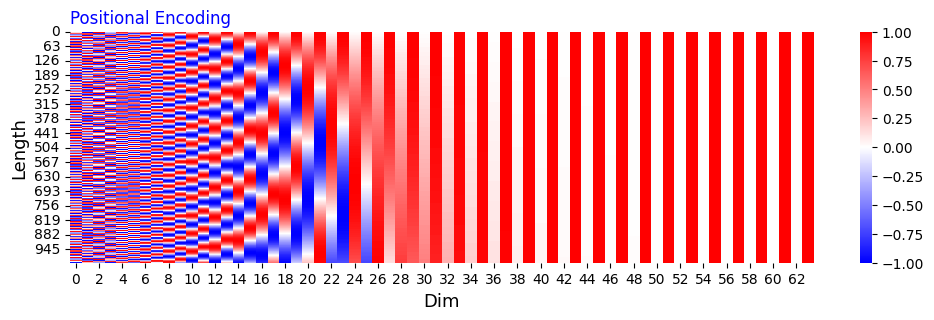

In [13]:
PE = PositionalEncoding(d_model=d_model, dropout=0.0, max_length=L)
pe = PE.pe[0].detach().cpu().numpy().round(2)
fig,ax = plt.subplots(figsize=(12,3))
sns.heatmap(pd.DataFrame(pe), cmap='bwr', ax = ax, vmin = -1, vmax=1)
ax.set_title('Positional Encoding', c='b', loc ='left')
ax.set_ylabel('Length', fontsize=13)
ax.set_xlabel('Dim', fontsize=13)

Text(0.5, 3.722222222222216, 'Dim')

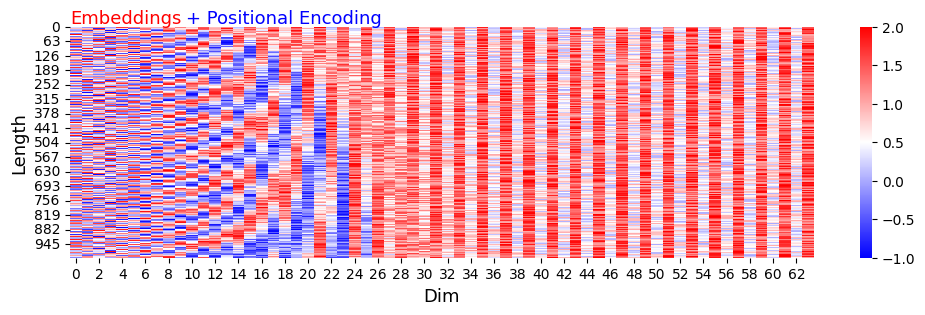

In [14]:
fig,ax = plt.subplots(figsize=(12,3))
out = pd.DataFrame(pe) + pd.DataFrame(x)
sns.heatmap(out, cmap='bwr', ax = ax, vmax=2, vmin=-1)

ax.text(x = 0, y = -15, s = 'Embeddings', c='r',  fontsize=13)

ax.text(x = 10, y = -15, s = '+ Positional Encoding', c='b', fontsize=13)

ax.set_ylabel('Length', fontsize=13)
ax.set_xlabel('Dim', fontsize=13)